## Supervised Learning : Finding Donors for *Charity*

## Getting Started

<b> Our goal in this Meetup session is to construct a model that accurately predicts whether an individual makes more than $50,000. </b>

<b> Scenario: </b> This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can infer this value from other publically available features. Let us supervised learning techniques and an analytical mind on data collected for the U.S. census to help CharityML (a fictitious charity organization) identify people most likely to donate to their cause.


<b> Dataset: </b>The dataset originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid".

<b> Featureset Exploration: </b>

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Exploring the Data

Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). 

All other columns are features about each individual in the census database.

In [28]:
# Import libraries necessary
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Data Exploration

Understanding the target cases set:

How many individuals fit into either group?<br>
How much percentage of these individuals making more than \$50,000?

In [2]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income']=='>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income']=='<=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


### Describe Data

In [3]:
# Get summary stats of numeric columns
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


---
## Preparing the Data

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**.

* checking for rows with missing values
* checking for outliers
* checking for skewness of feature values
* etc. and it never ends

In [4]:
## Drop records with NA's
## If True we don't have any rows with NA's.
data.shape == data.dropna().shape

True

### Transforming Skewed Continuous Features

Algorithms are sensitive to skewed continous values. We understand from the above data.desribe() there are two columns which has vast difference between min and max values: '`capital-gain'` and `'capital-loss'`. Let us plot their distribution.

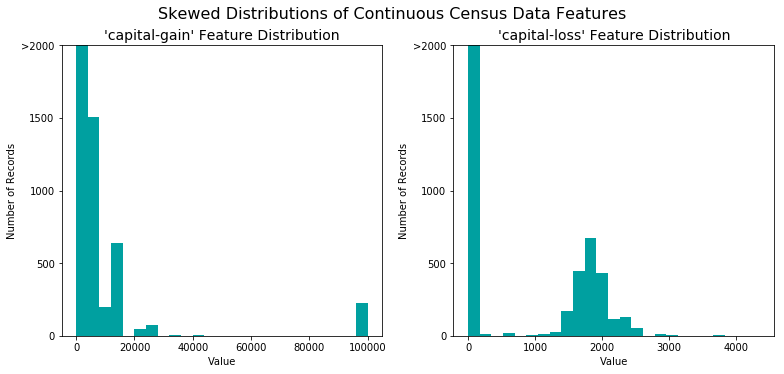

In [5]:
# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. 

Note: Make sure to add 1 to the features on which we apply Log transform as Log (0) is undefined.

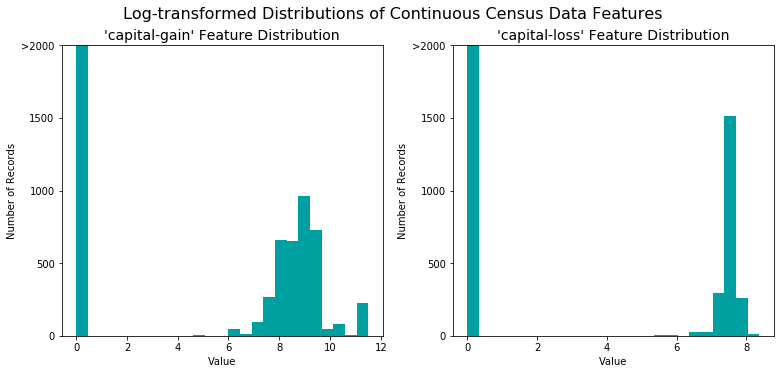

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
It is often good practice to perform some type of scaling on numerical features. however, normalization ensures that each feature is treated equally when applying supervised learners. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Data Preprocessing

#### Convert Categorical features to One-Hot Encoded features
Learning algorithms expect input to be numeric, which requires that non-numeric features (*categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme.

In [8]:
import pandas as pd

# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Print newly encoded feature names
#print (encoded)

103 total features after one-hot encoding.



####  Convert Target label 'income_raw' to numerical entries

Set records with "<=50K" to 0 and records with ">50K" to 1

In [9]:
# Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda ir: 1 if ir == '>50K' else 0)

### Shuffle and Split Data
We will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


---
##  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Decision Trees: 

**Real world application:**
* Admission decisions based on profiles
* Diaognise a disease is positive/negative.

**Strengths:**
* Decision trees are easy to use, understand by providing simple graphical illustration.
* By increasing depth of nodes we can try to understand the probable decision made for every possible scenario.
* Important features are easily identified on top nodes of the tree. 

**Weakness:**
* Decision trees with more input features are less readable and complex to follow.
* Exponential relations cannot be captured well compared to continous values.
* Decision boundaries are not very precise(Linear/box shaped) which is not always a good way to classify.

**Why a good candidate:**
* With preliminary feature observation I understand we have a balanced set of continous and categorical columns. Decision trees work better with both these types. Few features like sex, marital status, relationship can be easily included in the model. For the given dataset, it will be very easy to understand how the model is built and behaves if we use Decision Trees.

age	workclass	education_level	education-num	marital-status	occupation	relationship	race	sex	capital-gain	capital-loss	hours-per-week	native-country

### SVM:

**Real world application:**
* Classification of images like face, hand written digits detections.
* Classification of protien cells, cancel cells in patients.

**Strengths:**
* They work really well in complicated domains and when there is clear marginal separation.
* Effective in high dimensional data.

**Weakness:**
* SVM's take longer times on larger datasets.
* They are prone to fit the noise in the data which is not good.


**Why a good candidate:**
* Since we converted all our features into numerical values and created much more high dimensional space after performing one-hot notation we can use SVM'here.


### Ensemble Methods (AdaBoost):

**Real world application:**
* Kaggle Competitions & Image Classification problems

**Strengths:**
* Training on smaller datasets with underlying classifier improves generalization overall.
* Computationally efficient

**Weakness:**
* Do not work well on biased datasets.

**Why a good candidate:**
* Since the data has both categorical and continous values and not a biased dataset we an consider use AdaBoosting with underlying Decision Tree algorithm to generalize the data better.

### Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. 

 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [11]:
# Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, average='weighted', beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, average='weighted', beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Initial Model Evaluation

- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

In [12]:
# Import the three supervised learning models from sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Initialize the three models
clf_A = SVC(random_state=45)
clf_B = AdaBoostClassifier(random_state=45)
clf_C = DecisionTreeClassifier(random_state=45)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    print ('-'*100)
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
print ('-'*100)

----------------------------------------------------------------------------------------------------
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
----------------------------------------------------------------------------------------------------
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
----------------------------------------------------------------------------------------------------


In [13]:
#Printing out the values
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

SVC


,1%,10%,100%
acc_test,0.756219,0.832615,0.837148
acc_train,0.760000,0.833333,0.853333
f_test,0.601178,0.817743,0.828620
f_train,0.606723,0.815161,0.842954
pred_time,0.174591,1.375090,14.319807
train_time,0.009564,0.642622,77.317679


AdaBoostClassifier


,1%,10%,100%
acc_test,0.820674,0.849862,0.857601
acc_train,0.893333,0.840000,0.850000
f_test,0.816421,0.844010,0.850808
f_train,0.889614,0.828545,0.838834
pred_time,0.041443,0.052203,0.043997
train_time,0.034355,0.114002,1.011344


DecisionTreeClassifier


,1%,10%,100%
acc_test,0.750249,0.801769,0.819237
acc_train,1.000000,0.996667,0.970000
f_test,0.758737,0.803458,0.817980
f_train,1.000000,0.996669,0.969853
pred_time,0.003676,0.004211,0.004354
train_time,0.002211,0.017995,0.266175


----
## Evaluating Model Performance

### Metrics

Accuracy is important if we are interested in predicting who makes more than \$50,000 accurately.

Additionally, a model's ability to **precisely** predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision.

#### Note:

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

#### Precision & Recall Example:

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

In [18]:
results

{'SVC': {0: {'train_time': 0.00956416130065918,
   'pred_time': 0.1745908260345459,
   'acc_train': 0.76,
   'acc_test': 0.7562189054726368,
   'f_train': 0.6067226890756303,
   'f_test': 0.6011782093715522},
  1: {'train_time': 0.6426219940185547,
   'pred_time': 1.3750901222229004,
   'acc_train': 0.8333333333333334,
   'acc_test': 0.8326147042564953,
   'f_train': 0.8151609553478711,
   'f_test': 0.817743291973102},
  2: {'train_time': 77.31767916679382,
   'pred_time': 14.319807052612305,
   'acc_train': 0.8533333333333334,
   'acc_test': 0.8371475953565506,
   'f_train': 0.8429538099441013,
   'f_test': 0.8286201531685078}},
 'AdaBoostClassifier': {0: {'train_time': 0.03435492515563965,
   'pred_time': 0.0414431095123291,
   'acc_train': 0.8933333333333333,
   'acc_test': 0.8206744057490326,
   'f_train': 0.8896140896140897,
   'f_test': 0.816421125866926},
  1: {'train_time': 0.11400198936462402,
   'pred_time': 0.05220317840576172,
   'acc_train': 0.84,
   'acc_test': 0.84986180

### Visualize & Compare Performance Metrics

In [25]:
# TP = np.sum(income)      # Counting the ones as this is the naive case.
# FP = income.count() - TP # Specific to the naive case
# TN = 0                   # No predicted negatives in the naive case
# FN = 0                   # No predicted negatives in the naive case

# accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy = n_greater_50k / n_records
# recall = TP / (TP + FN)
recall = n_greater_50k / (n_greater_50k + 0)
# precision = TP / (TP + FP)
precision = n_greater_50k / (n_greater_50k + n_at_most_50k)
# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))
# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

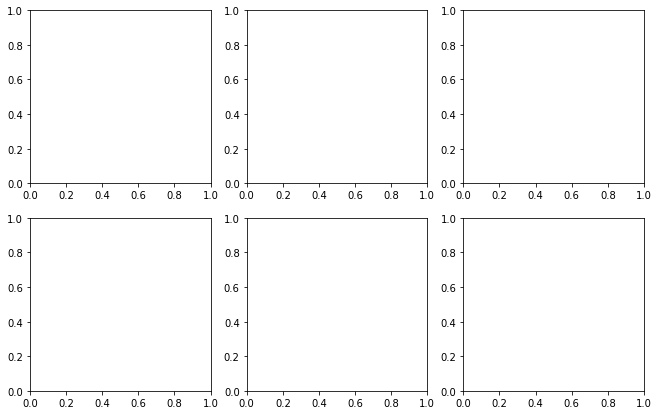

In [29]:
# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore) # Not working, should debug

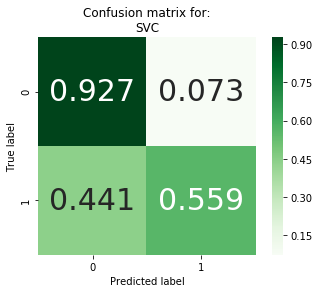

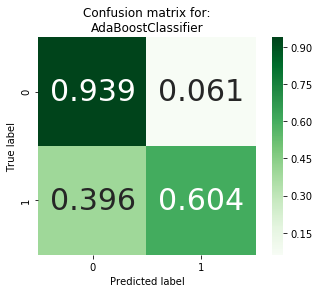

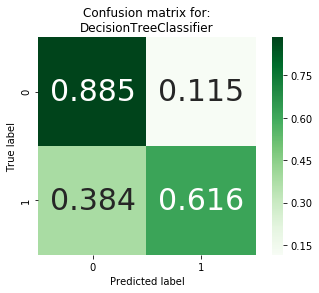

In [20]:
# Visualizing the confusion matrix for each classifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Greens', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

----
## Model Tuning

Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values.

In [22]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import make_scorer, f1_score

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=45)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f1_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf_C, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train.values, y_train.values)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------------------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------------------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------------------
Accuracy score on testing data: 0.8192
F-score on testing data: 0.6293

Optimized Model
------------------
Final accuracy score on the testing data: 0.8562
Final F-score on the testing data: 0.7217


----
## Extracting Feature Importance

Determining which features provide the most predictive power by focusing on the relationship between only a few crucial features and the target label will simplify our understanding of the phenomenon.

Here, we are trying to understand top 5 features.

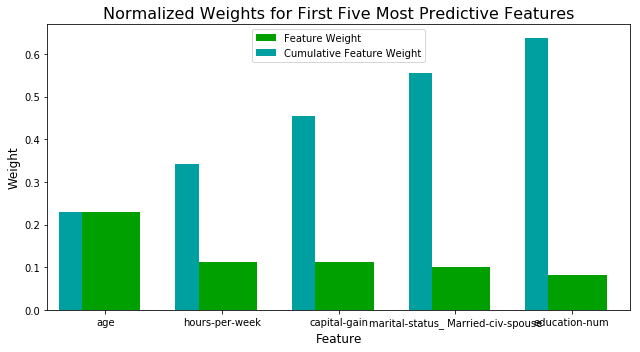

In [23]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier()

# Extract the feature importances using .feature_importances_ 
importances = model.fit(X_train, y_train).feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Predicting Using Important Features
With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. We are going to use above top 5 features we extracted to perform the prediction and see difference in accuracy levels.

In [24]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8562
F-score on testing data: 0.7217

Final Model trained on reduced data
------
Accuracy on testing data: 0.8454
F-score on testing data: 0.6937
